With Oversampling

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from imblearn.over_sampling import RandomOverSampler


# Upload & Load Dataset

uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

print("Original class distribution:")
print(df['Class'].value_counts())


# Basic Cleaning (safety)

df = df.drop_duplicates()
df = df.fillna(0)


# Balance Dataset (Oversampling)

X = df.drop('Class', axis=1)
y = df['Class']

ros = RandomOverSampler(random_state=42)
X_bal, y_bal = ros.fit_resample(X, y)

df_balanced = pd.concat([X_bal, y_bal], axis=1)

print("\nBalanced class distribution:")
print(df_balanced['Class'].value_counts())


# Sampling Techniques

def simple_random_sampling(df, frac=0.7):
    return df.sample(frac=frac, random_state=42)

def stratified_sampling(df, frac=0.7):
    return df.groupby('Class', group_keys=False).apply(
        lambda x: x.sample(frac=frac, random_state=42)
    )

def cluster_sampling(df, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df.drop('Class', axis=1))
    temp = df.copy()
    temp['Cluster'] = clusters
    return temp[temp['Cluster'].isin([0, 1])].drop('Cluster', axis=1)

def systematic_sampling(df, step=5):
    return df.iloc[::step]

def bootstrap_sampling(df, n=1000):
    return df.sample(n=n, replace=True, random_state=42)

# Models

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=3)
}


# Evaluation Function

def evaluate_model(X, y, model):
    stratify_val = y if y.value_counts().min() >= 2 else None

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=stratify_val
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    if isinstance(model, KNeighborsClassifier):
        model = KNeighborsClassifier(n_neighbors=min(3, len(X_train)))

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return accuracy_score(y_test, preds)


# Apply Sampling & Evaluate

results = pd.DataFrame(
    index=models.keys(),
    columns=[
        "Simple Random",
        "Stratified",
        "Cluster",
        "Systematic",
        "Bootstrap"
    ]
)

samplings = {
    "Simple Random": simple_random_sampling(df_balanced),
    "Stratified": stratified_sampling(df_balanced),
    "Systematic": systematic_sampling(df_balanced),
    "Bootstrap": bootstrap_sampling(df_balanced)
}

# Ensure cluster sample has both classes
while True:
    cluster_sample = cluster_sampling(df_balanced)
    if cluster_sample['Class'].nunique() >= 2:
        samplings["Cluster"] = cluster_sample
        break

for samp_name, samp_df in samplings.items():
    X_s = samp_df.drop('Class', axis=1)
    y_s = samp_df['Class']

    for model_name, model in models.items():
        results.loc[model_name, samp_name] = round(
            evaluate_model(X_s, y_s, model) * 100, 2
        )

print("\nFinal Accuracy Table:")
display(results)








Saving Creditcard_data.csv to Creditcard_data (5).csv
Original class distribution:
Class
0    763
1      9
Name: count, dtype: int64

Balanced class distribution:
Class
0    756
1    756
Name: count, dtype: int64


/tmp/ipython-input-1017673470.py:57: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('Class', group_keys=False).apply(



Final Accuracy Table:


,Simple Random,Stratified,Cluster,Systematic,Bootstrap
Logistic Regression,91.19,90.88,96.97,90.11,91.0
Decision Tree,100.0,98.43,99.13,97.8,99.67
Random Forest,100.0,99.37,99.57,100.0,100.0
SVM,97.8,96.54,97.4,96.7,96.67
KNN,96.54,96.54,98.27,89.01,99.33


Bar Plot

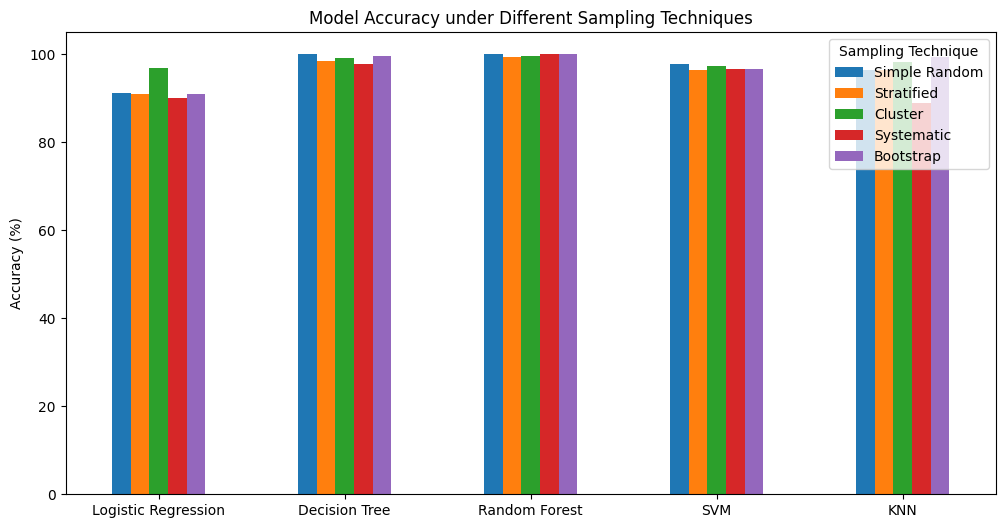

In [52]:
results.astype(float).plot(kind='bar', figsize=(12,6))
plt.title("Model Accuracy under Different Sampling Techniques")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=0)
plt.legend(title="Sampling Technique")
plt.show()


Heatmap


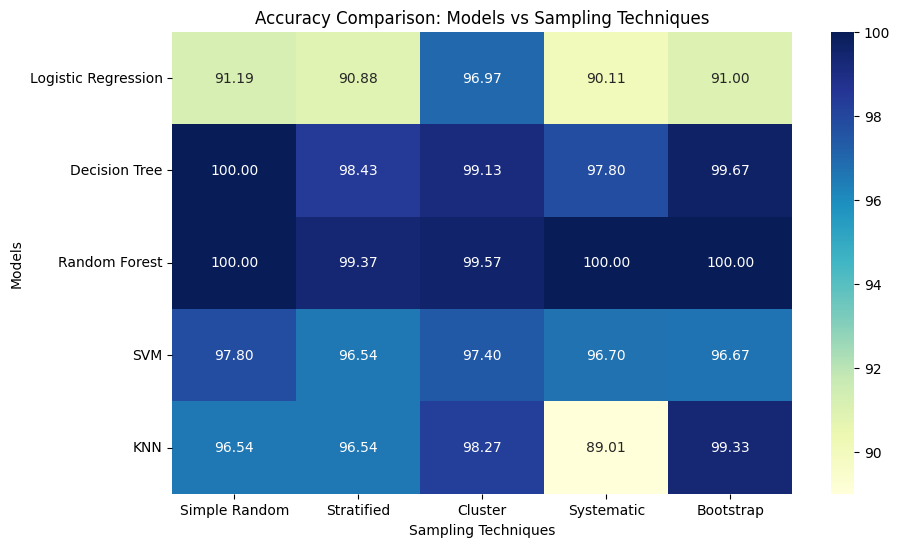

In [51]:
plt.figure(figsize=(10, 6))
sns.heatmap(results.astype(float), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Accuracy Comparison: Models vs Sampling Techniques")
plt.ylabel("Models")
plt.xlabel("Sampling Techniques")
plt.show()


Best Model per Sampling

In [50]:
best_models = results.astype(float).idxmax()
print("\nBest model for each sampling technique:")
print(best_models)


Best model for each sampling technique:
Simple Random    Decision Tree
Stratified       Random Forest
Cluster          Random Forest
Systematic       Random Forest
Bootstrap        Random Forest
dtype: object


With Undersampling

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans


# Upload & Load Dataset

uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])

print("Original class distribution:")
print(df['Class'].value_counts())

# Basic Cleaning
df = df.drop_duplicates()
df = df.fillna(0)


# Balance Dataset (UNDERSAMPLING)
df_majority = df[df['Class'] == 0]
df_minority = df[df['Class'] == 1]

df_majority_sampled = df_majority.sample(
    n=len(df_minority), random_state=42
)

df_balanced = pd.concat([df_majority_sampled, df_minority])
df_balanced = df_balanced.sample(frac=1, random_state=42)

print("\nBalanced class distribution (after undersampling):")
print(df_balanced['Class'].value_counts())


# Sampling Techniques
def simple_random_sampling(df, frac=0.7):
    return df.sample(frac=frac, random_state=42)

def stratified_sampling(df, frac=0.7):
    return df.groupby('Class', group_keys=False).apply(
        lambda x: x.sample(frac=frac, random_state=42)
    )

def cluster_sampling(df, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df.drop('Class', axis=1))
    temp = df.copy()
    temp['Cluster'] = clusters
    return temp[temp['Cluster'].isin([0, 1])].drop('Cluster', axis=1)

def systematic_sampling(df, step=5):
    return df.iloc[::step]

def bootstrap_sampling(df, n=500):
    return df.sample(n=n, replace=True, random_state=42)


# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=3)
}


# Evaluation Function
def evaluate_model(X, y, model):
    stratify_val = y if y.value_counts().min() >= 2 else None

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=stratify_val
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    if isinstance(model, KNeighborsClassifier):
        model = KNeighborsClassifier(
            n_neighbors=min(3, len(X_train))
        )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return accuracy_score(y_test, preds)


# Apply Sampling & Evaluate
results = pd.DataFrame(
    index=models.keys(),
    columns=[
        "Simple Random",
        "Stratified",
        "Cluster",
        "Systematic",
        "Bootstrap"
    ]
)

samplings = {
    "Simple Random": simple_random_sampling(df_balanced),
    "Stratified": stratified_sampling(df_balanced),
    "Systematic": systematic_sampling(df_balanced),
    "Bootstrap": bootstrap_sampling(df_balanced)
}

# Ensure cluster sample has both classes
while True:
    cluster_sample = cluster_sampling(df_balanced)
    if cluster_sample['Class'].nunique() >= 2:
        samplings["Cluster"] = cluster_sample
        break

for samp_name, samp_df in samplings.items():
    X_s = samp_df.drop('Class', axis=1)
    y_s = samp_df['Class']

    for model_name, model in models.items():
        results.loc[model_name, samp_name] = round(
            evaluate_model(X_s, y_s, model) * 100, 2
        )

print("\nFinal Accuracy Table:")
display(results)



Saving Creditcard_data.csv to Creditcard_data (6).csv
Original class distribution:
Class
0    763
1      9
Name: count, dtype: int64

Balanced class distribution (after undersampling):
Class
0    9
1    9
Name: count, dtype: int64


/tmp/ipython-input-3829422698.py:54: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby('Class', group_keys=False).apply(



Final Accuracy Table:


,Simple Random,Stratified,Cluster,Systematic,Bootstrap
Logistic Regression,25.0,50.0,50.0,50.0,100.0
Decision Tree,25.0,50.0,0.0,50.0,100.0
Random Forest,25.0,50.0,75.0,50.0,100.0
SVM,25.0,50.0,75.0,100.0,100.0
KNN,50.0,50.0,25.0,0.0,100.0



Heatmap

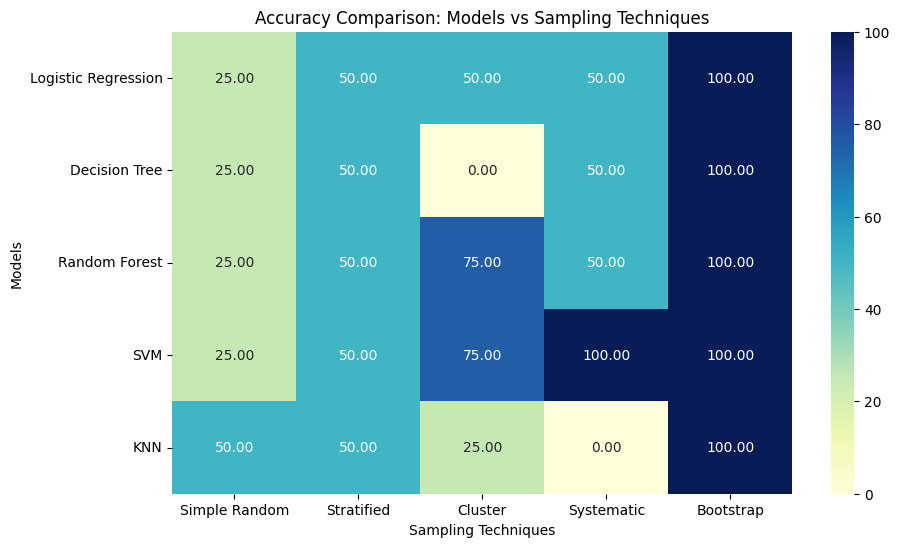

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(results.astype(float), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Accuracy Comparison: Models vs Sampling Techniques")
plt.ylabel("Models")
plt.xlabel("Sampling Techniques")
plt.show()

Bar Plot

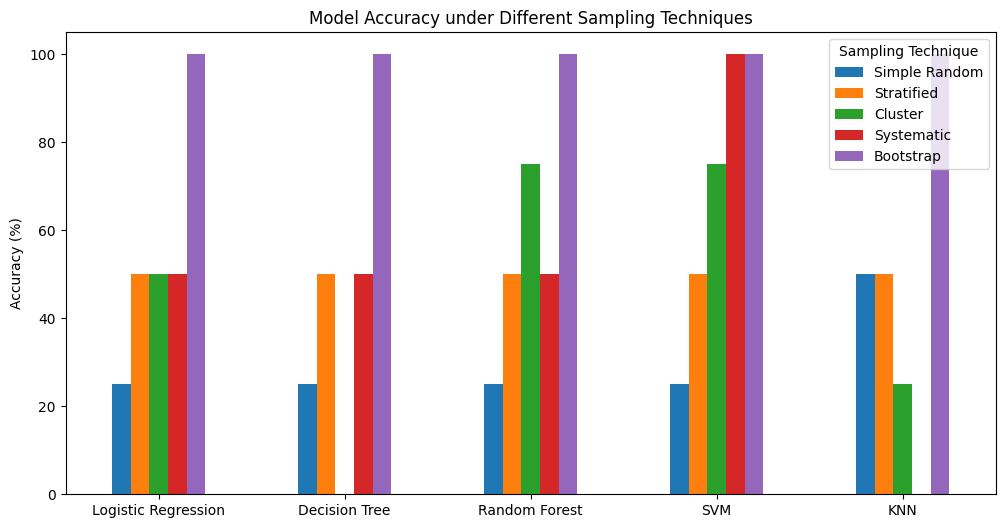

In [55]:
results.astype(float).plot(kind='bar', figsize=(12,6))
plt.title("Model Accuracy under Different Sampling Techniques")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=0)
plt.legend(title="Sampling Technique")
plt.show()

Best Model per Sampling

In [56]:
best_models = results.astype(float).idxmax()
print("\nBest model for each sampling technique:")
print(best_models)


Best model for each sampling technique:
Simple Random                    KNN
Stratified       Logistic Regression
Cluster                Random Forest
Systematic                       SVM
Bootstrap        Logistic Regression
dtype: object
